<a href="https://colab.research.google.com/github/Lukas-Swc/neural-network-course/blob/main/03_keras/06_save_load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Zapisywanie i ładowanie wag z modelu

Celem tego notebook'a jest nauczenie się pracy z obsługą modeli, m.in.:
 - zapisanie wag po każdej epoce
 - zapisanie wag po określonej liczbie epok
 - załadowanie wag
 - zapisanie całego modelu
 - załadowanie całego modelu

### Spis treści:
1. [Import bibliotek](#a0)
2. [Załadowanie danych i wstępna eksploracja](#a1)
3. [Budowa modelu](#a2)
4. [Zapisywanie punktów kontrolnych podczas trenowania](#a3)
5. [Załadowanie wag do modelu](#a4)
6. [Dodatkowe opcje](#a5)
7. [Ręczne zapisywanie wag](#a6)
8. [Zapisanie całego modelu](#a7)




### <a name='a0'> </a> 1. Import bibliotek

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

sns.set()
tf.__version__

'2.18.0'

### <a name='a1'> </a> 2. Załadowanie danych i wstępna eksploracja

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

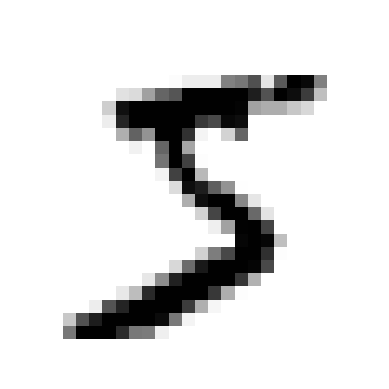

In [4]:
plt.imshow(train_images[0], cmap='gray_r')
plt.grid(False)
plt.axis(False)

In [5]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
# Recznie wykonana warstwa Flatten
train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

### <a name='a2'> </a> 3. Budowa modelu

In [7]:
def create_model():
    model = tf.keras.models.Sequential([
  tf.keras.layers.Input((784,)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### <a name='a3'> </a> 4. Zapisywanie punktów kontrolnych podczas trenowania

In [8]:
checkpoint_path = 'training/cp.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [9]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[cp_callback])

Epoch 1/10
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4463 - loss: 1.7244
Epoch 1: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4830 - loss: 1.6295 - val_accuracy: 0.7860 - val_loss: 0.7140
Epoch 2/10
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8691 - loss: 0.4662
Epoch 2: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8697 - loss: 0.4644 - val_accuracy: 0.8120 - val_loss: 0.5659
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9224 - loss: 0.3132
Epoch 3: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9226 - loss: 0.3125 - val_accuracy: 0.8530 - val_loss: 0.4626
Epoch 4/10
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9508 - loss: 0.2001
Epoch 4: saving model to training/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9504 - loss: 0.2029 - val_accuracy: 0.8620 - val_loss: 0.4270
Epoch 5

In [10]:
ls -l {checkpoint_dir}

total 4792
-rw-r--r-- 1 root root 4906368 Jun  4 18:37 cp.weights.h5


### <a name='a4'> </a> 5. Załadowanie wag do modelu

In [11]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 1s - 17ms/step - accuracy: 0.0950 - loss: 2.4226
0.0949999988079071


In [12]:
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - 3ms/step - accuracy: 0.8660 - loss: 0.4117


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


0.8659999966621399


### <a name='a5'> </a> 6. Dodatkowe opcje

In [21]:
!rm -rf ./training

In [22]:
checkpoint_path = 'training/checkpoint.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1,
                              save_best_only=True)

model = create_model()

model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[cp_callback], verbose=0)


Epoch 1: val_loss improved from inf to 0.69423, saving model to training/checkpoint.weights.h5

Epoch 2: val_loss improved from 0.69423 to 0.52106, saving model to training/checkpoint.weights.h5

Epoch 3: val_loss improved from 0.52106 to 0.49049, saving model to training/checkpoint.weights.h5

Epoch 4: val_loss improved from 0.49049 to 0.48941, saving model to training/checkpoint.weights.h5

Epoch 5: val_loss improved from 0.48941 to 0.42731, saving model to training/checkpoint.weights.h5

Epoch 6: val_loss improved from 0.42731 to 0.41591, saving model to training/checkpoint.weights.h5

Epoch 7: val_loss improved from 0.41591 to 0.41085, saving model to training/checkpoint.weights.h5

Epoch 8: val_loss improved from 0.41085 to 0.40392, saving model to training/checkpoint.weights.h5

Epoch 9: val_loss did not improve from 0.40392

Epoch 10: val_loss did not improve from 0.40392

Epoch 11: val_loss improved from 0.40392 to 0.40042, saving model to training/checkpoint.weights.h5

Epoch

In [30]:
!ls -l ./training

total 4792
-rw-r--r-- 1 root root 4906368 Jun  4 18:42 checkpoint.weights.h5


In [29]:
model = create_model()
model.load_weights('training/checkpoint.weights.h5') # Zmieniona linia

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


32/32 - 0s - 12ms/step - accuracy: 0.8730 - loss: 0.4004
0.8730000257492065


### <a name='a6'> </a> 7. Ręczne zapisywanie wag

In [33]:
checkpoint_dir = './checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

model.save_weights('./checkpoints/my_checkpoint.weights.h5')

model = create_model()

model.load_weights('./checkpoints/my_checkpoint.weights.h5')

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - 14ms/step - accuracy: 0.8730 - loss: 0.4004
0.8730000257492065


In [34]:
!ls -l checkpoints/

total 1612
-rw-r--r-- 1 root root 1647248 Jun  4 18:52 my_checkpoint.weights.h5


### <a name='a7'> </a> 8. Zapisanie całego modelu

In [35]:
model = create_model()
model.fit(train_images, train_labels, epochs=5)
model.save('my_model.h5')

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5413 - loss: 1.5646
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8861 - loss: 0.4260
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9468 - loss: 0.2526
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9556 - loss: 0.2086
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9664 - loss: 0.1403


In [36]:
new_model = tf.keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,052 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [37]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - 14ms/step - accuracy: 0.8640 - loss: 0.4225
0.8640000224113464
